In [26]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

%matplotlib inline


In [28]:
# Sample 1 million data points from a normal distribution
def sample_data(size):
    x1 = np.random.normal(3,2,size=size)
    x2 = np.random.normal(-1,2,size=size)
    theta=np.array([[3,1,2]]).T
    X=np.c_[np.ones(size),x1,x2]
    epsilon=np.random.normal(0,2**0.5,size=size)
    epsilon=np.c_[epsilon]
    Y=np.dot(X,theta)+epsilon
    
    # Y=np.dot(X,theta)
    return X,Y
X,Y=sample_data(1000000)


In [37]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# Implement stochastic gradient descent
def sgd(theta,X,Y,alpha,max_iter,r,epsilon):
    m=len(Y)
    X,Y=unison_shuffled_copies(X,Y)
    batches=m//r
    converged=False
    iter=0
    # while not converged:
    #     ans+=1
    cost_last=-1
    costvector=[]
    while not converged:
        iter+=1
        for b in range(batches):
            X_b=X[b*r:(b+1)*r]
            # print(X_b)
            Y_b=Y[b*r:(b+1)*r]
            H = np.dot(X_b,theta)
            loss=np.dot((H-Y_b).T,(H-Y_b))
            # print(X_b.T.shape,H.shape,Y_b.shape,(H-Y_b).shape)
            grad=np.dot(X_b.T,(H-Y_b))/(2*m)
            theta=theta-alpha*grad
            if(b!=batches-1):
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:b*r].T,(np.dot(X[(b-1)*r:b*r],theta)-Y[(b-1)*r:b*r]))
            else:
                theta=theta-(alpha/m)*np.dot(X[(b-1)*r:].T,(np.dot(X[(b-1)*r:],theta)-Y[(b-1)*r:]))
            cost=loss/(2*r)
            cost=cost[0,0]
            costvector.append(cost)
        if abs(cost_last-cost)<epsilon:
            converged=True
        cost_last=cost
        if iter>max_iter:
            converged=True
    plt.plot(costvector)
    return theta,iter
theta,iter=sgd([[0],[0],[0]],X,Y,alpha=0.001,max_iter=1000,r=10000,epsilon=1e-9)
print("Theta: ",theta)
print("Total Iterations: ",iter)

KeyboardInterrupt: 

In [23]:
def get_cost(X,Y,theta):
    m=len(X)
    H = np.dot(X,theta)
    loss=np.dot((H-Y).T,(H-Y))
    cost=loss/(2*m)
    return cost[0,0]

[array([[0.2229573 ],
       [0.85015534],
       [0.22760342]]), array([[0.31796546],
       [1.15541481],
       [0.50679314]]), array([[0.37340305],
       [1.284452  ],
       [0.76203941]]), array([[0.41629709],
       [1.35178214],
       [0.97782864]]), array([[0.45492567],
       [1.39390815],
       [1.15554304]]), array([[0.49183543],
       [1.4232083 ],
       [1.30056042]]), array([[0.52781945],
       [1.44445611],
       [1.41853493]]), array([[0.56313312],
       [1.45991234],
       [1.51444078]]), array([[0.59786595],
       [1.47091692],
       [1.59242571]]), array([[0.63205546],
       [1.47840449],
       [1.65588411]]), array([[0.66572228],
       [1.48308553],
       [1.70757485]]), array([[0.69888097],
       [1.48552088],
       [1.74973452]]), array([[0.73154354],
       [1.48615991],
       [1.78417456]]), array([[0.76372062],
       [1.48536478],
       [1.81236156]]), array([[0.79542193],
       [1.48342794],
       [1.83548275]]), array([[0.82665652],
   

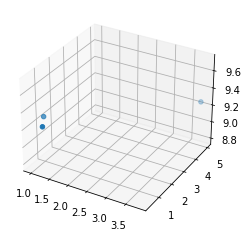

In [7]:
ax=plt.axes(projection='3d')

ax.scatter3D(X[:10000][1],X[:10000][2],Y[:10000][0])
plt.show()


NameError: name 'x1' is not defined

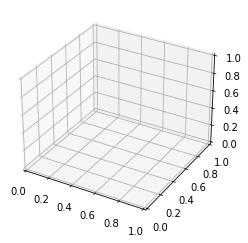

In [8]:
ax=plt.axes(projection='3d')
ax.scatter3D(x1[0:1000],x2[0:1000],Y[0:1000])

In [ ]:
a=np.ones(10)
a=np.asmatrix(a)
print(a.T)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print(X)
np.random.shuffle(X)
print(X)



[[ 1.          6.52810469 -0.71191286]
 [ 1.          3.821197   -2.70819148]
 [ 1.          4.95747597  0.52207545]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]]
[[ 1.          3.80031442  1.90854701]
 [ 1.          2.7935623  -0.3738646 ]
 [ 1.          6.73511598 -0.11227353]
 [ 1.          3.821197   -2.70819148]
 [ 1.          1.04544424 -0.33265135]
 [ 1.          4.90017684  1.98815815]
 [ 1.          7.4817864  -0.75664997]
 [ 1.          2.69728558 -1.41031653]
 [ 1.          6.52810469 -0.71191286]
 [ 1.          4.95747597  0.52207545]]


In [ ]:
# Notes
# 1. Use np.asmatrix or np.array([[10,20,30]]) or use np.c_[]
# 2. Always check dimensions